In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
def download_file(url):
    local_filename = url.split('/')[-1]
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)
    return local_filename

In [3]:
# Download dataset from github
file_url = 'https://raw.githubusercontent.com/xinxiewu/datasets/main/pima_indians_diabetes.csv'
df = pd.read_csv(download_file(file_url))
df.head(1)

,preg,glucose,bp,skin_thick,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1


In [4]:
df.describe()

,preg,glucose,bp,skin_thick,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
dm = df[df['diabetes']==1]
dm.describe()

,preg,glucose,bp,skin_thick,insulin,bmi,pedigree,age,diabetes
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [6]:
dm_non = df[df['diabetes']==0]
dm_non.describe()

,preg,glucose,bp,skin_thick,insulin,bmi,pedigree,age,diabetes
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [7]:
# Diabetes Group
df.loc[(df['diabetes'] == 1) & (df['glucose'] == 0), 'glucose'] = 140
df.loc[(df['diabetes'] == 1) & (df['bp'] == 0), 'bp'] = 74
df.loc[(df['diabetes'] == 1) & (df['skin_thick'] == 0), 'skin_thick'] = 27
df.loc[(df['diabetes'] == 1) & (df['insulin'] == 0), 'insulin'] = 100
df.loc[(df['diabetes'] == 1) & (df['bmi'] == 0), 'bmi'] = 34.25
df.loc[(df['diabetes'] == 1) & (df['pedigree'] == 0), 'pedigree'] = 0.449
# Non-Diabetes Group
df.loc[(df['diabetes'] == 0) & (df['glucose'] == 0), 'glucose'] = 107
df.loc[(df['diabetes'] == 0) & (df['bp'] == 0), 'bp'] = 70
df.loc[(df['diabetes'] == 0) & (df['skin_thick'] == 0), 'skin_thick'] = 21
df.loc[(df['diabetes'] == 0) & (df['insulin'] == 0), 'insulin'] = 68.792
df.loc[(df['diabetes'] == 0) & (df['bmi'] == 0), 'bmi'] = 30.05
df.loc[(df['diabetes'] == 0) & (df['pedigree'] == 0), 'pedigree'] = 0.336

In [8]:
dm = df[df['diabetes']==1]
dm.describe()

,preg,glucose,bp,skin_thick,insulin,bmi,pedigree,age,diabetes
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,142.302239,75.242537,31.029851,151.828358,35.398134,0.550500,37.067164,1.0
std,3.741239,29.488811,11.929762,8.914862,106.630239,6.590915,0.372354,10.968254,0.0
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000,1.0
25%,1.750000,119.000000,68.000000,27.000000,100.000000,30.900000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,100.000000,34.275000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [9]:
dm_non = df[df['diabetes']==0]
dm_non.describe()

,preg,glucose,bp,skin_thick,insulin,bmi,pedigree,age,diabetes
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,110.62200,70.844000,25.502000,101.261824,30.845100,0.429734,31.190000,0.0
std,3.017185,24.70392,11.928631,8.963631,80.497222,6.502196,0.299085,11.667655,0.0
min,0.000000,44.00000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,93.00000,63.500000,21.000000,68.792000,25.750000,0.229750,23.000000,0.0
50%,2.000000,107.00000,70.000000,21.000000,68.792000,30.075000,0.336000,27.000000,0.0
75%,5.000000,125.00000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.00000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [10]:
df.describe()

,preg,glucose,bp,skin_thick,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.378906,27.43099,118.907438,32.433919,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.104431,9.32146,93.570020,6.880664,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.00000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.00000,68.792000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,27.00000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.00000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

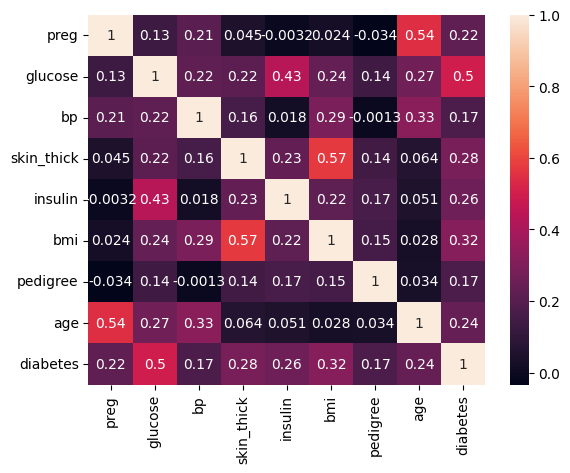

In [11]:
# Correlation
seaborn.heatmap(df.corr(), annot = True)

In [12]:
# Normalization
df.preg = (df.preg - df.preg.mean())/df.preg.std()
df.glucose = (df.glucose - df.glucose.mean())/df.glucose.std()
df.bp = (df.bp - df.bp.mean())/df.bp.std()
df.skin_thick = (df.skin_thick - df.skin_thick.mean())/df.skin_thick.std()
df.insulin = (df.insulin - df.insulin.mean())/df.insulin.std()
df.bmi = (df.bmi - df.bmi.mean())/df.bmi.std()
df.pedigree = (df.pedigree - df.pedigree.mean())/df.pedigree.std()
df.age = (df.age - df.age.mean())/df.age.std()
df.describe()

,preg,glucose,bp,skin_thick,insulin,bmi,pedigree,age,diabetes
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,-7.864080e-17,1.757853e-16,-1.734723e-17,1.260566e-16,-2.312965e-17,-3.608225e-16,2.451743e-16,2.035409e-16,0.348958
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.476951
min,-1.141108e+00,-2.549786e+00,-3.996793e+00,-2.191823e+00,-1.121165e+00,-2.068684e+00,-1.188778e+00,-1.040871e+00,0.000000
25%,-8.443348e-01,-7.197665e-01,-6.922181e-01,-6.899122e-01,-5.355929e-01,-7.170702e-01,-6.885198e-01,-7.857741e-01,0.000000
50%,-2.507887e-01,-1.535274e-01,-3.130310e-02,-4.623627e-02,-2.020673e-01,-5.579683e-02,-2.999328e-01,-3.606124e-01,0.000000
75%,6.395305e-01,6.096645e-01,6.296119e-01,4.901604e-01,8.915850e-02,6.054765e-01,4.659233e-01,6.597757e-01,1.000000
max,3.904034e+00,2.538160e+00,4.099415e+00,7.677875e+00,7.770572e+00,5.038188e+00,5.879733e+00,4.061069e+00,1.000000


In [13]:
df

,preg,glucose,bp,skin_thick,insulin,bmi,pedigree,age,diabetes
0,0.639530,0.864062,-0.031303,0.811998,-0.202067,0.169472,0.468187,1.425067,1
1,-0.844335,-1.203942,-0.526989,0.168322,-0.535593,-0.847872,-0.364823,-0.190548,0
2,1.233077,2.012953,-0.692218,-0.046236,-0.202067,-1.327476,0.604004,-0.105515,1
3,-0.844335,-1.072640,-0.526989,-0.475354,-0.266190,-0.629869,-0.920163,-1.040871,0
4,-1.141108,0.502982,-2.674963,0.811998,0.524661,1.550153,5.481337,-0.020483,1
...,...,...,...,...,...,...,...,...,...
763,1.826623,-0.678735,0.299154,2.206630,0.652907,0.067738,-0.908090,2.530487,0
764,-0.547562,0.010600,-0.196532,-0.046236,-0.535593,0.634544,-0.398023,-0.530677,0
765,0.342757,-0.022226,-0.031303,-0.475354,-0.073821,-0.906005,-0.684747,-0.275580,0
766,-0.844335,0.141902,-1.022676,-0.046236,-0.202067,-0.339200,-0.370859,1.169970,1


In [14]:
x = df.iloc[:, 0:8]
y = df.iloc[:, 8:9]

In [15]:
# 7:3 Data Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [16]:
# Baseline - Logistic Regression
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

C:\Users\wxx19\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
y_pred.shape

(231,)

In [18]:
conf_m = confusion_matrix(y_test, y_pred)

In [19]:
conf_m

array([[123,  28],
       [ 31,  49]], dtype=int64)

In [20]:
report = classification_report(y_test, y_pred)

In [21]:
print(report)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231



In [22]:
# Baseline - SVM
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

C:\Users\wxx19\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
conf_m

array([[126,  25],
       [ 29,  51]], dtype=int64)

In [24]:
print(report)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       151
           1       0.67      0.64      0.65        80

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231



In [25]:
# Baseline - NB
GNBclf = GaussianNB()
GNBclf.fit(x_train, y_train)
y_pred = GNBclf.predict(x_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

C:\Users\wxx19\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
conf_m

array([[119,  32],
       [ 29,  51]], dtype=int64)

In [27]:
print(report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.61      0.64      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

